In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Basic numpy example
A = np.identity(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
#Loading Data
data = np.loadtxt('ex1data1.txt', delimiter = ',')
df = pd.DataFrame(data , columns = ["population in 10000's" ,'profit in $10,000'])
df.head()
m = len(df)

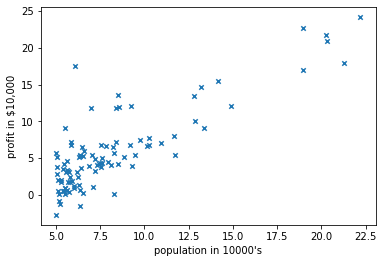

In [4]:
#Plotting Data 
    #using pd.plot.scatter(x,y)
df.plot.scatter(0, 1, marker='x')                       # 0 , 1 can be used
plt.savefig("Plotting of Data")
plt.show()

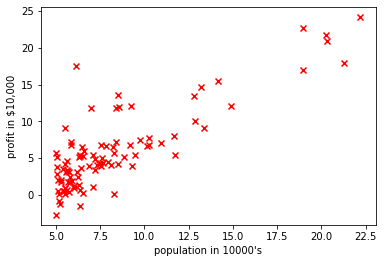

In [5]:
    #using matplotlib.pyplot
    #plt.scatter(x,y)
plt.scatter(data[:,0] , data[:,1] , color = 'red' , marker= 'x')
plt.xlabel("population in 10000's")
plt.ylabel("profit in $10,000")
plt.show()

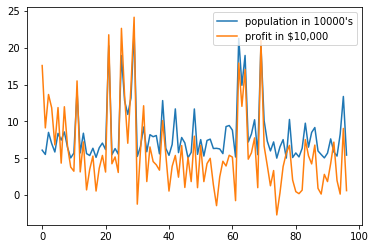

In [6]:
    #direct plot deaws continuous graphs
df.plot()
plt.savefig("Plot of Data")

In [7]:
#LINEAR REGRESSION (since data is continuous)
    #Cost Function
initial_theta = np.zeros((2,1))
alpha = 0.01
y = data[:, 1].reshape(m,1)
X = np.ones((m,2))
X[:,1] = data[:,0]
theta = initial_theta
J_iter=[]

def h(X,theta):
    return np.dot(X,theta)

h1  =  h(X,theta)

def J(h,y):
    return (((h-y)**2).sum())/(2*m)
print(J(h1, y))                            #Cost_Function with theta = [[0]
                                           #                            [0]]    

32.072733877455676


In [8]:
for i in range(100000):
    theta -= alpha*np.dot(X.T,(h1 -y))/m
    J_iter.append(J(h1, y))
    h1 = h(X, theta)     

In [9]:
print(theta)                             #final_theta
#print(h(X,theta))
print(J(h1, y))                         #cost_function with final_theta

[[-3.89578088]
 [ 1.19303364]]
4.476971375975179


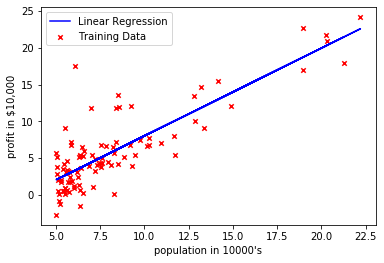

In [10]:
df.plot.scatter(0, 1, color='red', marker ='x', label='Training Data')  
plt.plot(data[:,0], h(X,theta), color = 'blue', label='Linear Regression')
plt.legend()
plt.savefig("Gradient Descent Hypothesis")
plt.show()

In [11]:
#Visualizing J over thetas
theta0 = np.arange(-10,10, 0.2)
theta1 = np.arange(-1,4,0.05)
J_val = np.zeros((len(theta0), len(theta1)))

for k in range(len(theta0)):
    for j in range(len(theta1)):
        J_val[k,j] = J(h(X,[[theta0[k]], [theta1[j]]] ), y)
        
#J_val        

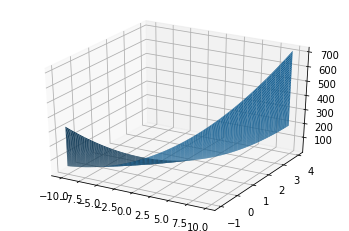

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0, theta1, J_val)
plt.savefig("Visualizing theta with theta values")

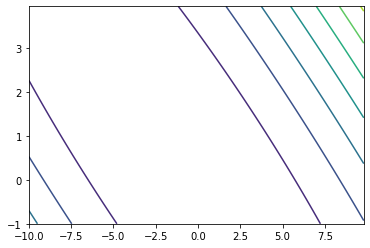

In [13]:
plt.contour(theta0, theta1, J_val)
plt.savefig("contour")

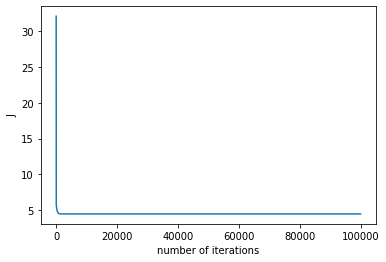

In [14]:
#Convergance of Gradiend Descent with alpha = 0.01
plt.plot(range(100000) , J_iter)
plt.xlabel("number of iterations")
plt.ylabel("J")
plt.savefig("Convergance of Gradiend Descent with alpha = 'eroPointZeroOne'")
plt.show()  

In [15]:
#Using Normalized Equation
theta_normalized  = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)) , X.T) , y)
theta_normalized

array([[-3.89578088],
       [ 1.19303364]])

In [16]:
#difference between theta b/w gradient desent and Normalized Equation
theta_normalized - theta

array([[-1.47881707e-13],
       [ 1.46549439e-14]])

In [92]:
#Multiple Variables
data_multi = np.loadtxt('ex1data2.txt', delimiter = ',')
df_multi  = pd.DataFrame(data_multi , columns = ['Size of house(in sq. feet)' , 'No. of bedrooms', 'Price of House'])
X1 = df_multi.iloc[: , 0:2]
m1 = len(data_multi)
y_multi = df_multi.iloc[:, 2].values.reshape(m1,1)

In [86]:
#feature_normalization  (as values of both features are on completely differnt scale)
for i in [0 , 1]:
    X1.iloc[:,i] = (X1.iloc[:,i] - X1.mean()[i])/(X1.max()[i] - X1.min()[i]) 

In [89]:
X_multi = np.ones((m1,3))
X_multi[:,1:] = X1
#X_multi

In [90]:
theta_multi  = np.dot(np.dot(np.linalg.inv(np.dot(X_multi.T,X_multi)) , X_multi.T) , y_multi)
theta_multi

array([[340412.65957447],
       [504777.90398791],
       [-34952.07644931]])

In [91]:
h_multi =  h(X_multi, theta_multi)
J_multi =  J(h_multi, y_multi)
J_multi


990042911.1168344

In [76]:
h([1 , -0.1105, -0.0425], theta_multi)

array([-0.10243867])